###Codigo e implementación https://github.com/Psychofun/Red-Neuronal-Numpy
Autor: PsyFun
##Preprocesamiento de los datos, para estandarizar ("gre","gpa") e individualizar la caracteristica categorica "rank"

In [ ]:
#Conexión con Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import math 

#Ruta del archivo binary con los datos en el drive (cambiar según sea el caso)
admissions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab redes neuronales/binary.csv')

print(admissions.describe())
print(admissions.shape)
print(admissions.head())

            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000
(400, 4)
   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


#Conversion de una variable categorica "rank" a variables binarias "rank_1","rank_2","rank_3", "rank_4"

In [ ]:
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
print(data.describe())
data = data.drop('rank', axis=1)
print(data.shape)
print(data.head())

            admit         gre         gpa       rank      rank_1      rank_2  \
count  400.000000  400.000000  400.000000  400.00000  400.000000  400.000000   
mean     0.317500  587.700000    3.389900    2.48500    0.152500    0.377500   
std      0.466087  115.516536    0.380567    0.94446    0.359955    0.485369   
min      0.000000  220.000000    2.260000    1.00000    0.000000    0.000000   
25%      0.000000  520.000000    3.130000    2.00000    0.000000    0.000000   
50%      0.000000  580.000000    3.395000    2.00000    0.000000    0.000000   
75%      1.000000  660.000000    3.670000    3.00000    0.000000    1.000000   
max      1.000000  800.000000    4.000000    4.00000    1.000000    1.000000   

           rank_3      rank_4  
count  400.000000  400.000000  
mean     0.302500    0.167500  
std      0.459916    0.373889  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    0.000000  
max      1.000000    1.

Estandarizacion de las variables ("gre","gpa")

In [ ]:
# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
print(data.shape)
print(data.describe())

(400, 7)
            admit           gre           gpa      rank_1      rank_2  \
count  400.000000  4.000000e+02  4.000000e+02  400.000000  400.000000   
mean     0.317500 -3.907985e-16  2.198242e-16    0.152500    0.377500   
std      0.466087  1.000000e+00  1.000000e+00    0.359955    0.485369   
min      0.000000 -3.183094e+00 -2.968993e+00    0.000000    0.000000   
25%      0.000000 -5.860633e-01 -6.829288e-01    0.000000    0.000000   
50%      0.000000 -6.665712e-02  1.340106e-02    0.000000    0.000000   
75%      1.000000  6.258844e-01  7.360075e-01    0.000000    1.000000   
max      1.000000  1.837832e+00  1.603135e+00    1.000000    1.000000   

           rank_3      rank_4  
count  400.000000  400.000000  
mean     0.302500    0.167500  
std      0.459916    0.373889  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    0.000000  
max      1.000000    1.000000  


dividir el conjunto de datos para entrenamiento y evaluación del modelo

In [ ]:
print(data.index)

RangeIndex(start=0, stop=400, step=1)


In [ ]:
# Split off random 10% of the data for testing
np.random.seed(21)

sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)      #Variando este parametro podemos decidir qué porcentaje de elementos van a ser entrenados y cuántos evaluados.
train_data, test_data = data.iloc[sample], data.drop(sample)
print(train_data.shape)
print(test_data.shape)

(360, 7)
(40, 7)


División de los datos en caracteristicas y etiquetas

In [ ]:
features, targets = train_data.drop('admit', axis=1), train_data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']
print( features.shape )
print( targets.shape )

(360, 6)
(360,)


Función de Activación

In [ ]:
def sigmoide(x):
    return 1/(1 + np.exp(-x))

In [15]:
# Hyperparameters
n_hidden = 2 # Número de unidades en la capa escondida
epochs = 1000 # Número de iteraciones sobre el conjunto de entrenamiento
alpha = 0.01 # Taza de aprendizaje

ult_costo = None 

m,k = features.shape # Número de ejemplos de entrenamiento, número de dimensiones en los datos 
# Inicialización de los pesos
entrada_escondida = np.random.normal(scale = 1/k**0.5,size = (k,n_hidden))
escondida_salida = np.random.normal(scale = 1/k**0.5,size = n_hidden)
print(entrada_escondida.shape)
print(escondida_salida.shape)
# Entrenamiento
for e in range(epochs):
    # Variables para el gradiente
    gradiente_entrada_escondida = np.zeros(entrada_escondida.shape)
    gradiente_escondida_salida =  np.zeros(escondida_salida.shape)
    # Itera sobre el conjunto de entrenamiento
    for x,y in zip(features.values,targets):
        # Pasada hacia adelande (forward pass) or forward propagation
        
        z = sigmoide(np.matmul(x, entrada_escondida))
        y_ =sigmoide(np.matmul(escondida_salida,z)) # predicción 

        # z = np.tanh(np.matmul(x, entrada_escondida))
        # y_ =np.tanh(np.matmul(escondida_salida,z)) # predicción 

        # Pasada hacia atrás (backward pass)
        salida_error = (y - y_) * y_ *(1- y_)
        escondida_error = np.dot(salida_error, escondida_salida) * z * (1 -z)

        gradiente_entrada_escondida += escondida_error * x[:,None]
        gradiente_escondida_salida += salida_error * z 
    # Actualiza los parámetros (pesos)
    entrada_escondida += alpha * gradiente_entrada_escondida / m 
    escondida_salida +=  alpha * gradiente_escondida_salida / m 

    if e % (epochs / 10 ) == 0:
        z = sigmoide(np.dot(features.values, entrada_escondida))
        y_ = sigmoide(np.dot(z, escondida_salida))

        # z = np.tanh(np.dot(features.values, entrada_escondida))
        # y_ = np.tanh(np.dot(z, escondida_salida))
    

        # Función de costo
        costo = np.mean(( y_ - targets)**2 )

        if ult_costo  and ult_costo < costo:
            print("Costo de  entrenamiento: ", costo, " ADVERTENCIA -  Costo subiendo")
        else:
            print("Costo de entrenamiento: ", costo )
        
        ult_costo = costo 

#  Precisión en los datos de prueba 

z = sigmoide(np.dot(features_test, entrada_escondida))
y_ = sigmoide(np.dot(z, escondida_salida))

# z = np.tanh(np.dot(features_test, entrada_escondida))
# y_ = np.tanh(np.dot(z, escondida_salida))

predicciones =  y_ > 0.5 
precision = np.mean(predicciones == targets_test)
print("Precisión: {:.3f}".format(precision))


(6, 2)
(2,)
Costo de entrenamiento:  0.23096637380865542
Costo de entrenamiento:  0.22988679034086068
Costo de entrenamiento:  0.22887969623055207
Costo de entrenamiento:  0.22793959600642058
Costo de entrenamiento:  0.22706140356097337
Costo de entrenamiento:  0.22624041688346774
Costo de entrenamiento:  0.22547229307413255
Costo de entrenamiento:  0.22475302396846636
Costo de entrenamiento:  0.22407891261168816
Costo de entrenamiento:  0.22344655075127795
Precisión: 0.650


# **Análisis de complejidad especifica Big O()**
Para este caso vamos tener en cuenta los siguientes parametros:
*   Número de iteraciones sobre el conjunto de entrenamiento (en el código "epochs").
*   Conjunto de datos para entrenamiento (en el código "features.values" y "targets"), los cuales dependerán del número de ejemplos de entrenamiento (en el código "m").

Como podemos ver en este algoritmo para entrenar redes neuronales mediante el gradiente descendiente, tenemos dos bucles for, el primero de ellos en la línea 17 el cual dependerá del número de iteraciones que queramos dar sobre el conjunto de entrenamiento (epochs), y posteriormente en la línea 22 tenemos otro for que está dentro del anterior, el cual depende principalmente del número de ejemplos de entrenamiento (m) que estén dentro del conjunto dado, por lo que la complejidad nos quedaría de la siguiente forma:

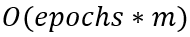

epochs= Número de iteraciones sobre el conjunto de entrenamiento.

m= Número de ejemplos de entrenamiento.

Teniendo en cuenta lo anterior, desde luego estos dos parametros epochs y m son los que afectan en mayor medida el coste temporal del algoritmo, esto debido a que un número elevado de ellas significa un entrenamiento lento. Ejecutar demasiadas epochs implica procesar las mismas muestras de entrenamiento demasiadas veces, especificamente en este caso m veces, por lo que independientemente si se aumenta uno u otro parametro el costo temporal aumentará, y por supuesto si aumentamos ambas este coste se incrementará aún más.




# **Construir un experimento, que le permita encontrar la cantidad de épocas suficientes, para entrenar esta red neuronal con los mismos datos.**

Antes de pasar con la parte práctica es importante tener en cuenta algunos conceptos teorícos para entender el por qué el costo computacional y temporal de esto es bastante elevado y llegar a una respuesta concisa es complicado. 

Primero que todo, la forma en la que se introducen y leen las muestras en esta red neuronal para su posterior entrenamiento es conocida como Descenso del gradiente en lotes (o batch), en la cual todos los datos disponibles para entrenamiento se introducen de una vez. Esto supondrá problemas de estancamiento, ya que el gradiente se calculará usando siempre todas las muestras, y llegará un momento en que las variaciones serán mínimas y requerirá de enormes cantidades de iteraciones para seguir minimizando el costo. Por lo que llegar a una convergencia cercana al cero requerirá grandes cantidades de tiempo.

Lo segundo es que existen formas de acelelar la convergencia del algoritmo, tales como variar algunos parametros (tasa de aprendizaje) o cambiar la función de activación o la de coste, sin embargo, se nos pide hacer este experimento con los mismos datos dados. 

**EXPERIMENTO**

Para intentar hallar el número de épocas necesarias para entrenar la red neuronal se optó por continuar el entrenamiento hasta que el coste sea lo suficientemente cercano a 0 como para asumir que la red neuronal está entrenada, esto por supuesto sin exceder un limite exagerado de tiempo. Cómo se mencionó anteriormente llegar a un número de épocas preciso en el que el coste sea muy cercano a 0 supondría una gran cantidad de tiempo, por lo que se hicieron diferentes pruebas en las que se llegó a un tope minimo del costo:

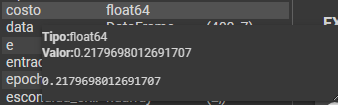  


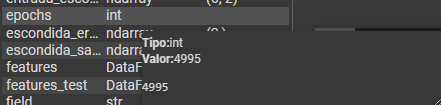

En esta prueba se llegó a que en aproximadamente 5000 épocas el valor del costo es un número cercano a 0.21, el cual es un buen número cercano al 0 que nos indica que la red neuronal efectivamente está siendo entrenada y dependiendo del número de ejemplos para la evaluación de la red podría tener una buena presición. Para este caso, el número de ejemplos de evaluación es de 40, el cual es un número relativamente bajo, sin embargo para este número se obtuvo una presición del 65%. Por otra parte, el tiempo de ejecución fue de aproximadamente 1 minuto, por lo que podemos ver que para altos valores de las épocas el tiempo computacional crece bastante rápido, esto último se repasará con el siguiente experimento.

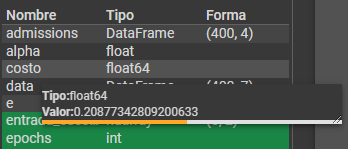

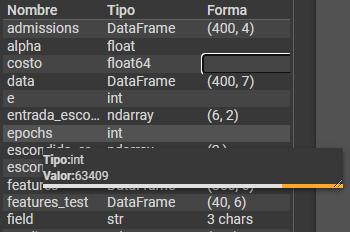

En este segundo experimento podemos ver como el valor del coste a diferencia del anterior no es muy diferente, es un valor muy cercano al 0.2, sin embargo, el número de épocas si varía demasiado al tener un valor de casi 64000. Podemos ver que cada vez es más demorado tener una disminución del coste, por lo que realmente para un coste muy cercano al 0 es complicado en cuestión de tiempo llegar a un número de épocas concreto. También cabe aclarar que se tardo cerca de 15 minutos de ejecución para llegar a estos resultados. 





# **Evalúe y compare la función de activación tanh()**

Para este caso en particular hemos venido utilizando la función de activación Sigmoide, esto debido a que nos ayuda a mapear los valores entre (0 a 1). Por lo tanto, se usa especialmente para modelos en los que tenemos que predecir la probabilidad como un resultado. Sin embargo, ¿Qué pasaría si usaramos tanh() como función de activación?

Vemos que los resultados (ubicados en la parte inferior) y el rendimiento de la red neuronal son ligeramente distintos a como los que teníamos con la Sigmoide, se observa igualmente una disminución en el costo de entrenamiento de una manera similar al caso del sigmoide, sin embargo, en general dicha medida tiende a ser mas alta  y finalmente logra una precisión bastante baja. Bueno, si bien la tanh() y la Sigmoide se utilizan como funciones de activación para el entrenamiento de Redes neuronales, podemos decir que tienen enfoques distintos principalmente en el cálculo del gradiente, respecto a su figura e intervalo de mapeo ( [ -1, 1 ] en el caso de tangente hiperbólica ) se observan similaridades en su comportamiento.


In [ ]:
def hyper(x):
  return ( np.exp(x) - np.exp( -x ) ) / ( np.exp(x) + np.exp( -x ))

In [18]:
# Hyperparameters
n_hidden = 2 # Número de unidades en la capa escondida
epochs = 1000 # Número de iteraciones sobre el conjunto de entrenamiento
alpha = 0.01 # Taza de aprendizaje

ult_costo = None 

m,k = features.shape # Número de ejemplos de entrenamiento, número de dimensiones en los datos 
# Inicialización de los pesos
entrada_escondida = np.random.normal(scale = 1/k**0.5,size = (k,n_hidden))
escondida_salida = np.random.normal(scale = 1/k**0.5,size = n_hidden)
print(entrada_escondida.shape)
print(escondida_salida.shape)
# Entrenamiento
for e in range(epochs):
    # Variables para el gradiente
    gradiente_entrada_escondida = np.zeros(entrada_escondida.shape)
    gradiente_escondida_salida =  np.zeros(escondida_salida.shape)
    # Itera sobre el conjunto de entrenamiento
    for x,y in zip(features.values,targets):
        # Pasada hacia adelande (forward pass) or forward propagation
        
        # Sigmoide
        # z = sigmoide(np.matmul(x, entrada_escondida))
        # y_ =sigmoide(np.matmul(escondida_salida,z)) # predicción 

        # Tangente hiperbólica 
        z = np.tanh(np.matmul(x, entrada_escondida))
        y_ = np.tanh(np.matmul(escondida_salida,z)) # predicción 

        # Pasada hacia atrás (backward pass)
        # Usando derivada de tangente hiperbolica (1 - tanh ** 2 )
        salida_error = (y - y_) * (1 - y_ ** 2 )
        escondida_error = np.dot(salida_error, escondida_salida) * (1 - z ** 2)

        gradiente_entrada_escondida += escondida_error * x[:,None]
        gradiente_escondida_salida += salida_error * z 
    # Actualiza los parámetros (pesos)
    entrada_escondida += alpha * gradiente_entrada_escondida / m 
    escondida_salida +=  alpha * gradiente_escondida_salida / m 

    if e % (epochs / 10 ) == 0:

        # z = sigmoide(np.dot(features.values, entrada_escondida))
        # y_ = sigmoide(np.dot(z, escondida_salida))

        z = np.tanh(np.dot(features.values, entrada_escondida))
        y_ = np.tanh(np.dot(z, escondida_salida))
    

        # Función de costo
        costo = np.mean(( y_ - targets)**2 )

        if ult_costo  and ult_costo < costo:
            print("Costo de  entrenamiento: ", costo, " ADVERTENCIA -  Costo subiendo")
        else:
            print("Costo de entrenamiento: ", costo )
        
        ult_costo = costo 

#  Precisión en los datos de prueba 

# z = sigmoide(np.dot(features_test, entrada_escondida))
# y_ = sigmoide(np.dot(z, escondida_salida))

z = np.tanh(np.dot(features_test, entrada_escondida))
y_ = np.tanh(np.dot(z, escondida_salida))

predicciones =  y_ > 0 # Tanh abarca desde -1 hasta 1, mas de 0 implica verdadero
precision = np.mean(predicciones == targets_test)
print("Precisión: {:.3f}".format(precision))


(6, 2)
(2,)
Costo de entrenamiento:  0.33973665547710785
Costo de entrenamiento:  0.31225255536228547
Costo de entrenamiento:  0.2950208608449502
Costo de entrenamiento:  0.2835736167232496
Costo de entrenamiento:  0.27535137852008523
Costo de entrenamiento:  0.26893450850592626
Costo de entrenamiento:  0.26353963176198775
Costo de entrenamiento:  0.25873504511724643
Costo de entrenamiento:  0.25428545801807984
Costo de entrenamiento:  0.2500669691229195
Precisión: 0.425
